In [1]:
from CRR.db.GenerateCsv import generate_customers, generate_products, generate_orders, save_to_csv
from CRR.db import db
from CRR.model import model
import pandas as pd
from CRR.model.plots import plot_rfm_distributions, cluster_p, age_dist_per_cluster, rfm_plots, RiskLevelPlot
import pandas as pd

In [2]:
customer_df = generate_customers(500)
product_df = generate_products(50)
order_df = generate_orders(500, 50, 2000)

In [3]:
save_to_csv(customer_df, "data/Customer.csv")
save_to_csv(product_df, "data/Product.csv")
save_to_csv(order_df, "data/Order.csv")

In [4]:
customer = pd.read_csv("data/Customer.csv")
order = pd.read_csv("data/Order.csv")
product = pd.read_csv("data/Product.csv")

In [5]:
RFM = model.get_rfm(customer, product, order)

In [6]:
Clusters = model.get_clusters(RFM)

Cluster Summary for 3 Clusters:
        Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0         12.32      5.43   3114.08   189
1         54.39      2.42   1535.69   219
2         51.08      5.30  10562.68    84


Cluster Summary for 4 Clusters:
        Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0         16.40      5.95   3538.57   146
1         25.14      2.67   1600.32   230
2         28.70      5.37  11080.86    70
3        181.37      3.11   3299.53    46


Cluster Summary for 5 Clusters:
        Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0         13.87      6.10   3458.22   133
1         13.51      2.81   1684.19   187
2         31.22      5.36  10993.95    72
3        211.13      2.97   3714.04    31
4         77.77      2.70   1892.10    69


Cluster Summary 

In [7]:
churn_risk = model.classify_churn_risk(Clusters)

/Users/areghovakimyan/Desktop/CRR/CRR/model/model.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_table['ChurnRiskLevel'] = np.select(conditions, values, default=default_value)


In [8]:
churn_risk.to_csv("data/Modeling.csv")

In [9]:
ChurnRate = model.churn_rate_by_risk_level(churn_risk)

In [10]:
ChurnRate.to_csv("data/ChurnRate.csv")

In [11]:
modeling = pd.read_csv("data/Modeling.csv")
customer = pd.read_csv("data/Customer.csv")
order = pd.read_csv("data/Order.csv")
product = pd.read_csv("data/Product.csv")


In [12]:
engine = db.create_engine_db()
db.initialize_database(engine)
Session = db.get_session(engine)

In [13]:
ChurnRate = pd.read_csv("data/ChurnRate.csv")
Modeling = pd.read_csv("data/Modeling.csv")
Product = pd.read_csv("data/Product.csv")
Customer = pd.read_csv("data/Customer.csv")
Order = pd.read_csv("data/Order.csv")

In [14]:
db.push_data_to_db(Session, ChurnRate, db.ChurnRate)
db.push_data_to_db(Session, Modeling, db.Modeling)
db.push_data_to_db(Session, Product, db.Product)
db.push_data_to_db(Session, Customer, db.Customer)
db.push_data_to_db(Session, Order, db.Order)

In [15]:
db.view_table(Session, db.ChurnRate)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x17179e5c0>, 'ChurnRate': 27.24, 'ChurnRiskLevel': 'High Risk'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x17179e560>, 'ChurnRate': 53.25, 'ChurnRiskLevel': 'Low Risk'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x17179e440>, 'ChurnRate': 19.51, 'ChurnRiskLevel': 'Medium Risk'}


In [16]:
df = pd.merge(modeling, customer, how = "inner")
df = pd.merge(df, customer, how = "inner")
df = pd.merge(df, order, how = "inner")
df = pd.merge(df, product, how = "inner")

<Figure size 1000x600 with 0 Axes>

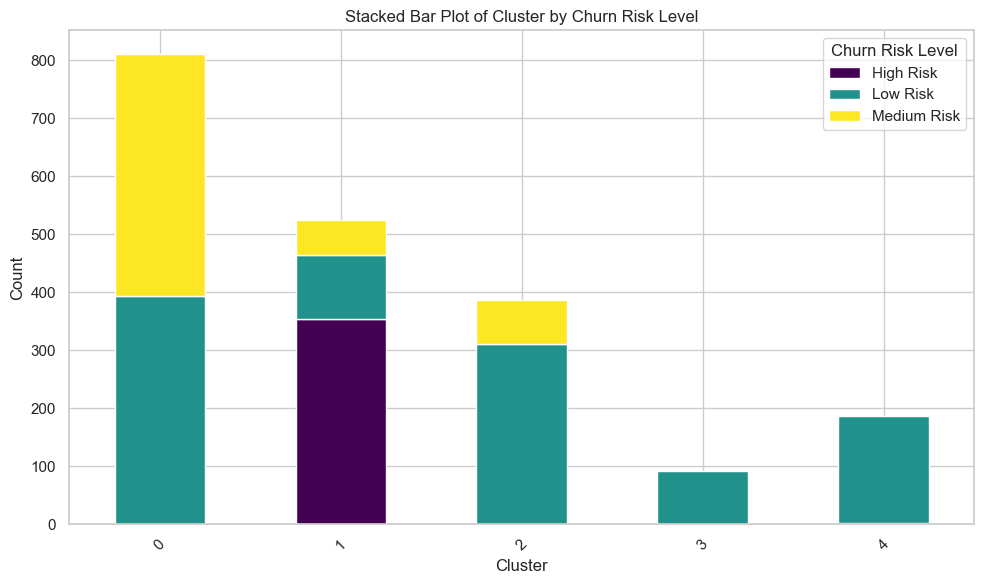

In [17]:
RiskLevelPlot(df)

# Customer Clusters Analysis and Marketing Solutions

## Cluster 0: Engaged Regulars
- **Profile Description:** Regular customers with recent interactions and moderate spending.
- **Marketing Solutions:**
  - **Loyalty Rewards:** Introduce loyalty points or discounts for frequent purchases to encourage continued engagement.
  - **Personalized Communication:** Use personalized email or SMS marketing to remind them of new products or services.

## Cluster 1: Dormant High-Value
- **Profile Description:** High-value customers, not the most recent visitors but high spenders.
- **Marketing Solutions:**
  - **Re-engagement Campaigns:** Create targeted campaigns offering special discounts or exclusive access to new products to re-engage these customers.
  - **Customer Feedback:** Reach out for feedback to understand their needs and improve their customer journey.

## Cluster 2: Casual Newcomers
- **Profile Description:** Infrequent, lower-spending customers with recent interactions.
- **Marketing Solutions:**
  - **First-Time Buyer Offers:** Encourage a second purchase through introductory offers or a thank-you discount after their first purchase.
  - **Engagement Programs:** Introduce them to an engagement program that educates about the brand’s values and benefits.

## Cluster 3: Elite Enthusiasts
- **Profile Description:** Very active, high-spending customers with frequent interactions.
- **Marketing Solutions:**
  - **Exclusive Membership:** Offer an exclusive membership or VIP status that includes premium services and products.
  - **Special Events:** Invite them to special events or product launches, making them feel valued and part of the brand’s community.

## Cluster 4: Sporadic Spenders
- **Profile Description:** Infrequent visitors who spend moderately but interact rarely.
- **Marketing Solutions:**
  - **Win-Back Strategies:** Implement win-back strategies such as reactivation emails with offers tailored to their previous purchasing history.
  - **Survey and Feedback:** Conduct surveys to understand their disengagement reasons and tailor communications to address these areas.

These strategies should help each cluster feel more valued and understood, potentially decreasing churn rates by increasing customer satisfaction and loyalty.


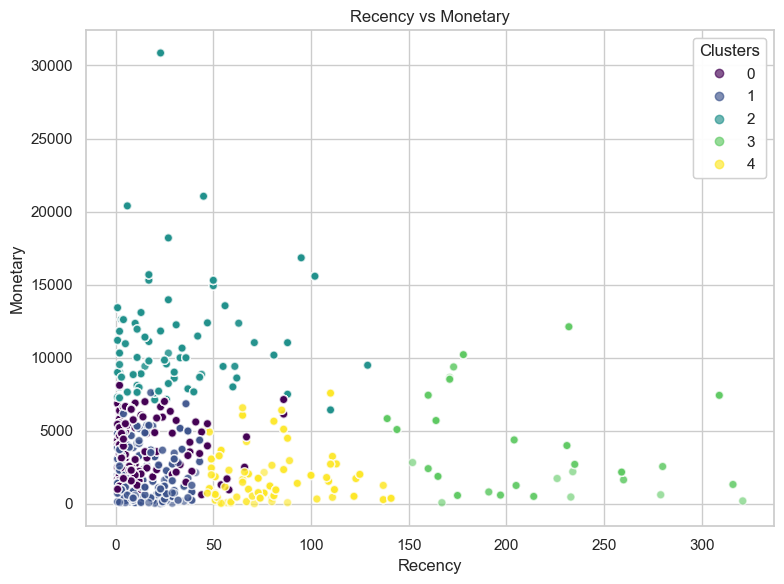

In [18]:
rfm_plots(df)


**Cluster 0**:
   • Recency: Moderately recent interactions (average 14 days).
   • Frequency: Customers in this cluster purchase frequently (average 5 transactions).
   • Monetary: Moderate spending (average $2,681.61).
   • Profile: Regular customers with recent interactions and moderate spending.
   
**Cluster 1**:
 • Recency: Less recent interactions compared to Cluster 0 (average 35 days).
 • Frequency: Similar frequency of purchases as Cluster 0 (average 4 transactions).
 • Monetary: High spenders (average $8,922.34).
 • Profile: High-value customers, not the most recent visitors but high spenders.

**Cluster 2**:
 • Recency: Recent interactions but less frequent than Cluster 0 (average 29 days).
 • Frequency: Infrequent purchases (average 2 transactions).
 • Monetary: Lower spending (average $1,797.29).
 • Profile: Infrequent, lower-spending customers with recent interactions.

**Cluster 3**:
 • Recency: Recent interactions (average 22 days).
 • Frequency: High frequency of transactions (average 7 transactions).
 • Monetary: Very high spenders (average $13,626.99).
 • Profile: Very active, high-spending customers with frequent interactions.
 
**Cluster 4**:
 • Recency: Rare interactions (average 201 days).
 • Frequency: Infrequent purchases (average 3 transactions).
 • Monetary: Moderate to high spending (average $4,932.73).
 • Profile: Infrequent visitors who spend moderately but interact rarely.

The plot is, a scatter plot of "Recency vs Monetary" segmented by "Clusters," offers a visual way to analyze customer behavior based on how recently they've made purchases and how much they've spent, with each point representing a customer. Here's a breakdown of the plot.

1. **Recency (X-axis)**:
   - This axis represents the time since a customer's last purchase, with lower values indicating more recent interactions. Customers who have interacted recently are typically considered more engaged and possibly more loyal.

2. **Monetary (Y-axis)**:
   - This axis shows the total spending by each customer. Higher values on this axis suggest that the customer spends more, indicating their higher monetary value to your business.

3. **Clusters (Colors)**:
   - Each color represents a different cluster of customers, grouped based on similarity in their spending behavior and engagement (recency and monetary values). These clusters help in identifying different customer segments, for instance:
     - **High Value, Recent Customers**: Likely colored distinctly, these customers have both low recency values and high monetary values, making them prime targets for retention and loyalty programs.
     - **Low Spending, Recent Customers**: Another cluster might represent those who have recently made purchases but spend less. Strategies for this group could involve cross-selling or upselling to increase their spending.
     - **High Spending, Less Recent Customers**: Customers who have spent a lot but not recently might need re-engagement strategies to bring them back.

4. **Legend**:
   - The legend helps to identify which color corresponds to each cluster, allowing you to easily see how different customer groups are distributed across the plot.

**Overall Interpretation**:
- By examining where clusters are located relative to the axes, we can gauge the health of customer relationships and spending patterns. For instance, clusters that are positioned towards lower recency values (towards the left of the plot) and higher monetary values (towards the top of the plot) are typically your most valuable customers.
- Clusters in the opposite quadrant (high recency and low monetary) might indicate customers at risk of churn or those who need different engagement tactics to increase their value. This plot is an excellent tool for making strategic decisions based on customer data. It helps in tailoring marketing efforts, optimizing customer engagement strategies, and potentially forecasting future sales trends based on the observed patterns.

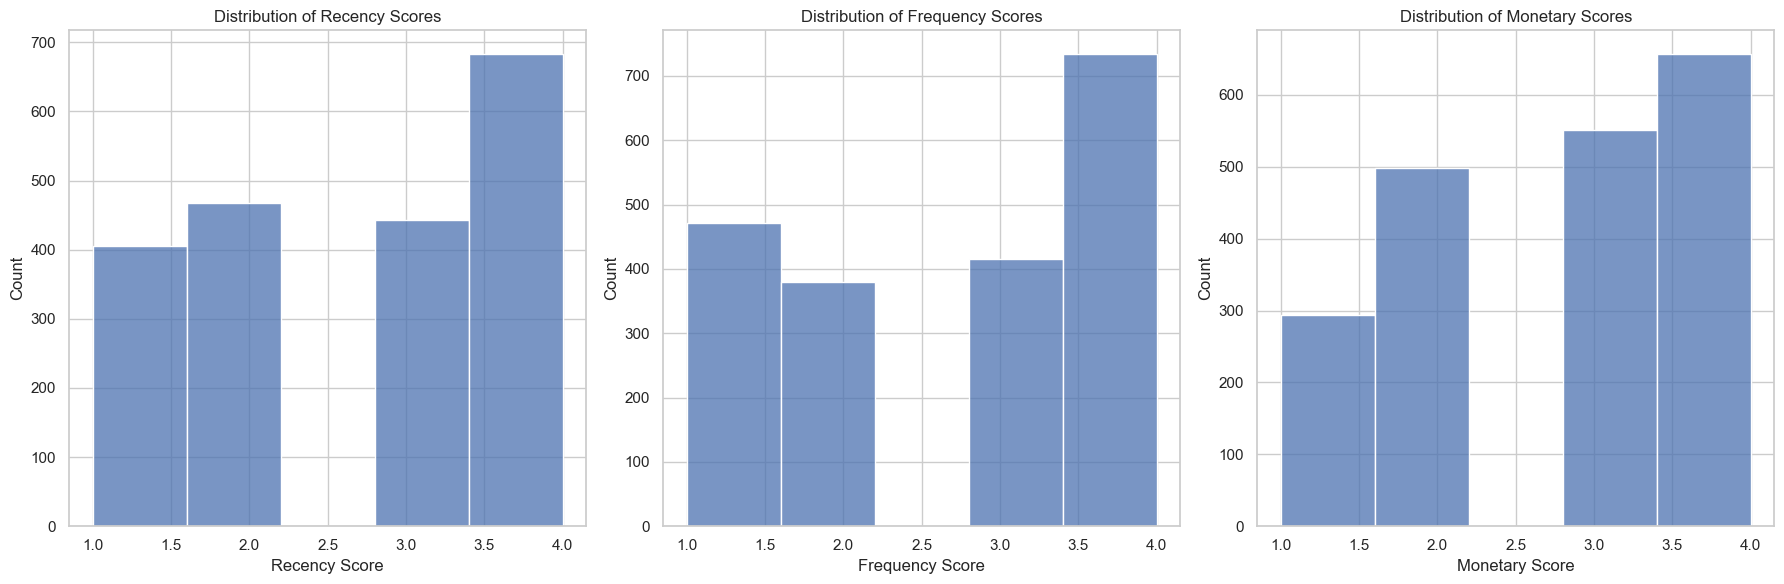

In [19]:
plot_rfm_distributions(df)

1. **Distribution of Recency Scores**:
   - **X-axis (Recency Score)**: This represents the score given to customers based on how recently they have interacted or made a purchase. Typically, a lower score might indicate less recent interaction, and a higher score represents more recent activity.
   - **Y-axis (Count)**: This shows the number of customers who received each Recency score.
   - **Histogram**: Each bar in the histogram represents a range of Recency scores and the height of the bar shows how many customers fall into each score range. This helps in understanding how recently the majority of your customer base has interacted with the business.

2. **Distribution of Frequency Scores**:
   - **X-axis (Frequency Score)**: This measures how often a customer interacts or makes purchases within a specific time period. Higher scores generally mean higher frequency of interaction.
   - **Y-axis (Count)**: Reflects the number of customers who fall into each frequency scoring category.
   - **Histogram**: Similar to the Recency plot, the bars indicate how many customers are interacting at each frequency level. This plot is useful to identify if you have a lot of repeat customers or if interactions are more sporadic.

3. **Distribution of Monetary Scores**:
   - **X-axis (Monetary Score)**: Represents the monetary value associated with each customer, typically scored based on the total spend. Higher scores would indicate higher spending.
   - **Y-axis (Count)**: Displays the count of customers in each monetary score bracket.
   - **Histogram**: Shows how customer spending is distributed. A higher concentration of customers in higher score ranges would suggest that a substantial portion of your customer base is spending more, which can be crucial for targeting marketing and sales strategies.

**Overall Interpretation**:
These histograms collectively offer a comprehensive view of your customer base’s behavior across three critical dimensions: how recently they purchase (Recency), how often they engage (Frequency), and how much they spend (Monetary). By analyzing these plots, you can tailor marketing efforts to specific segments, identify potential areas for improvement in customer engagement, and understand the spending habits of your customer base to enhance revenue-generating strategies.

If we're presenting this information in a business setting or to stakeholders, it's helpful to emphasize the segments where strategic efforts can enhance customer retention, increase frequency of purchases, or boost revenue.

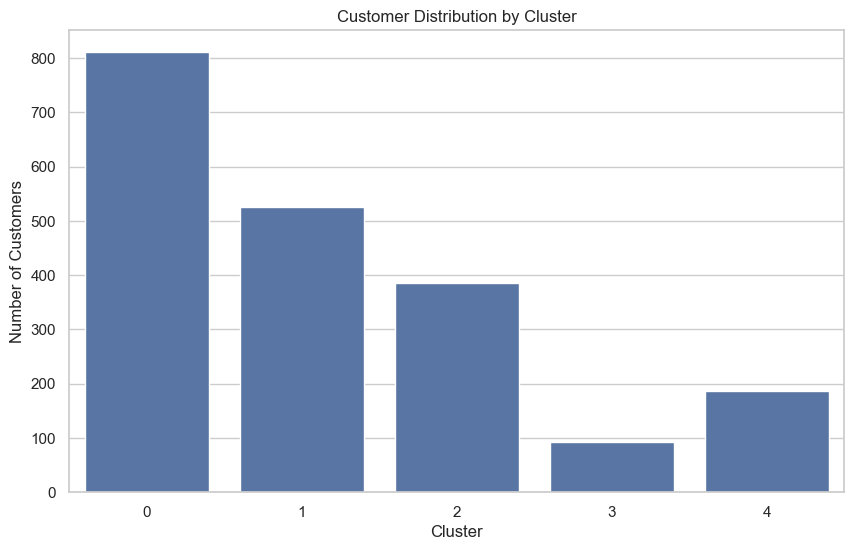

In [20]:
cluster_p(df)

### What the Plot Shows
- **X-axis (Cluster)**: This represents different groups or segments of customers, usually determined through a clustering algorithm that categorizes customers based on certain behaviors or attributes like spending habits, activity frequency, etc.
- **Y-axis (Number of Customers)**: This shows the count of customers in each cluster. Each bar's height represents how many customers fall into each respective cluster.

### Interpretation and Implications
1. **Identifying Major and Minor Segments**: 
   - The height of each bar will tell you the size of each customer cluster. Larger bars indicate more populated clusters, which are major segments of your customer base. Conversely, shorter bars represent smaller, perhaps more niche segments.
   
2. **Strategic Planning**:
   - Clusters with many customers might need different strategies compared to those with fewer customers. For example, a cluster with a large number of customers might benefit from broad-based marketing campaigns, while smaller clusters might be targeted with more personalized approaches.

3. **Resource Allocation**:
   - Understanding the distribution helps in allocating resources effectively. More resources might be directed towards engaging and retaining larger clusters, or alternatively, trying to grow smaller clusters if they represent a higher value or potential.

4. **Customer Insights**:
   - The distribution can provide insights into how diverse the customer base is. If one or two clusters dominate, it suggests homogeneity in customer behaviors or needs. A more uniform distribution across several clusters indicates a diverse customer base with varied needs and preferences.

**Overall Interpretation**:
- **Strategic Insight**: This plot serves as a fundamental analysis tool for strategic decision-making in marketing, sales, and customer relationship management. It helps stakeholders understand the landscape of their customer base, guiding them in crafting tailored strategies for different segments.
- **Operational Decisions**: By analyzing which clusters are larger, businesses can prioritize initiatives, campaigns, and improvements based on where they will impact the most customers, potentially leading to better customer satisfaction and increased business performance.

Overall, the "Customer Distribution by Cluster" plot is essential for visualizing the composition of your customer base and informing strategies to enhance customer engagement and business growth.

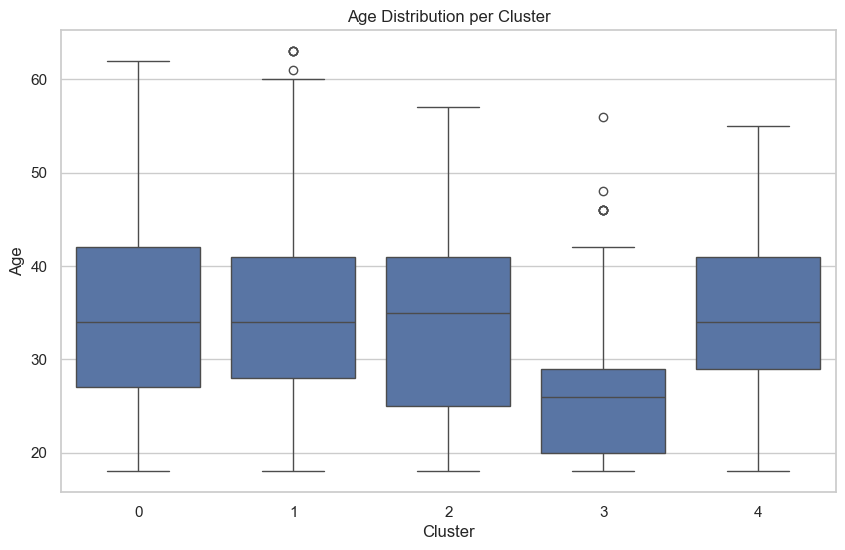

In [21]:
age_dist_per_cluster(df)

### What the Plot Shows
- **X-axis (Cluster)**: This axis displays different customer clusters, which are groups formed based on certain characteristics like purchasing behavior, engagement, demographic attributes, etc.
- **Y-axis (Age)**: This axis shows the age of customers within each cluster.

### Elements of a Boxplot
Each boxplot on the chart represents a cluster and includes several components:
- **Median (the horizontal line inside the box)**: This line shows the middle value of age in the dataset for that cluster, dividing the upper half from the lower half.
- **Interquartile Range (IQR, the box itself)**: The box spans from the 25th percentile to the 75th percentile of the age distribution, essentially covering the middle 50% of data for that cluster.
- **Whiskers**: These lines extend from the box to the highest and lowest values within 1.5 times the IQR from the box, excluding outliers.
- **Outliers (individual points)**: These are ages that lie outside the range of the whiskers and are typically considered exceptionally high or low.

### Interpretation and Implications
1. **Understanding Age Distribution**:
   - The median provides a good indication of the central tendency of age in each cluster, which helps understand the typical age of customers in each group.
   - The IQR reveals the range of ages that most customers fall into, providing insight into the age diversity within the cluster.

2. **Cluster Comparisons**:
   - Comparing medians across clusters can indicate which clusters are younger or older on average.
   - Differences in the spread of the IQR between clusters highlight variations in age diversity. A wider IQR suggests a broader age range among customers.

3. **Targeted Marketing and Product Design**:
   - Clusters with younger medians might be targeted with products, services, and marketing strategies that appeal to younger demographics.
   - Conversely, clusters with older age profiles might be approached with offerings and communications tailored to older individuals.

4. **Resource Allocation**:
   - Insights from the age distribution can guide where to allocate resources more effectively to engage with specific age groups more likely to resonate with certain product offerings or messages.

**Overall Interpretation**:
The "Age Distribution per Cluster" plot is a crucial analytical tool for understanding the demographic composition of customer segments. By observing the age patterns within each cluster, businesses can fine-tune their strategies, ensuring they cater appropriately to the demographic characteristics of their customer base. This tailored approach can enhance customer satisfaction and drive more effective marketing outcomes.